In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import confusion_matrix    
from xgboost import XGBClassifier  

In [130]:
#pip install xgboost // if not installed

In [131]:
data = pd.read_csv('kanser.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [132]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True) # Data içerisindeki gereksiz sütunları çıkardık // We removed unnecessary columns from the data

In [133]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis] # M = 1 , B = 0 olarak değiştirdik // We changed M = 1, B = 0

In [134]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [135]:
y =  data.diagnosis.values # diagnosis sütununu y değişkenine atadık  bağımlı değişken // We assigned the diagnosis column to the y variable, the dependent variable
x = data.drop(['diagnosis'],axis=1) # diagnosis sütununu çıkardık // We removed the diagnosis column

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=33) # verileri train ve test olarak ayırdık  // We separated the data as train and test

In [137]:
sc = StandardScaler() # verileri ölçeklendirdik normalization işlemi yaptık // We scaled the data, we did the normalization process
xtrain = sc.fit_transform(x_train) # train verilerini ölçeklendirdik // we scaled the train data
xtest = sc.transform(x_test) # test verilerini ölçeklendirdik  // we scaled the test data

In [138]:
xgb = XGBClassifier(eval_metrics ="logloss", # eval_metrics : modelin başarısını ölçmek için kullanılan metrik // eval_metrics: metric used to measure the success of the model
                    n_estimators=100, # ağaç sayısı // number of trees
                    max_depth=3, # ağaç derinliği // tree depth
                    subsample=1, # alt örneklem // subsample
                    colsample_bytree=1, # colsample_bytree : her ağacın alt örneklemi  // colsample_bytree: subsample of each tree
                    random_state=2) # random state değeri ile modelin her seferinde aynı sonuçları vermesini sağladık // we ensured that the model gives the same results each time with the random state value


In [139]:
xgb.fit(x_train,y_train) # modeli eğittik    // we trained the model

c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:06:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, eval_metrics='logloss', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [140]:
ypred = xgb.predict(x_test) # test verileri ile tahmin yaptık  // we made predictions with test data 
accuracy = xgb.score(x_test,y_test) # modelin doğruluk oranını hesapladık // we calculated the accuracy rate of the model
print("Accuracy: %",accuracy*100) # doğruluk oranını yazdırdık

Accuracy: % 93.85964912280701


In [141]:
cm = confusion_matrix(y_test,ypred) # confusion matrix oluşturduk   // we created a confusion matrix  
print(cm) # confusion matrixi yazdırdık 

[[68  3]
 [ 4 39]]


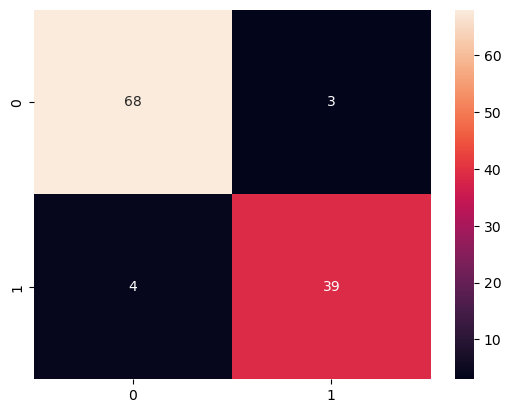

XGBoost Modeli Doğruluk Oranı: % 93.85964912280701


In [142]:
import seaborn as sns
sns.heatmap(cm,annot=True) # confusion matrixi görselleştirdik // we visualized the confusion matrix
plt.show() # görselleştirdiğimiz confusion matrixi ekrana bastırdık // we printed the visualized confusion matrix to the screen
print("XGBoost Modeli Doğruluk Oranı: %",accuracy*100) # modelin doğruluk oranını yazdırdık // we printed the accuracy rate of the model

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of the GradientBoostingClassifier // GradientBoostingClassifier'ın bir örneğini oluşturun
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data // Modeli eğitim verilerine uydurun
gb.fit(x_train, y_train)

# Predict on the test data // Test verileri üzerinde tahmin yapın
y_pred = gb.predict(x_test)

# Evaluate the model // Modeli değerlendirin
accuracy = gb.score(x_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9298245614035088


In [145]:
from sklearn.ensemble import RandomForestClassifier    
rf = RandomForestClassifier(n_estimators=150,random_state=1) # modeli oluşturduk // we created the model
rf.fit(x_train,y_train) # modeli eğittik // we trained the model
ypred = rf.predict(x_test) # test verileri ile tahmin yaptık    // we made predictions with test data 
accuracy = rf.score(x_test,y_test) # modelin doğruluk oranını hesapladık // we calculated the accuracy rate of the model
print("Accuracy: %",accuracy*100) # doğruluk oranını yazdırdık // we printed the accuracy rate

Accuracy: % 93.85964912280701
